In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt')
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [3]:
df.dtypes

Unnamed: 0       int64
Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [4]:
mms = StandardScaler()
df[['Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom', 'Price']] = mms.fit_transform(df[['Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom', 'Price']])
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,-1.014897,-0.772347,-0.828956,0.402694,0.276918,0.000370
1,2,2134.800,-0.242042,-0.772347,1.151328,0.402694,0.276918,0.449714
2,3,1138.560,-0.242042,-0.772347,-0.828956,0.402694,-1.187117,-0.111966
3,4,1458.780,-1.014897,-0.772347,0.161186,0.402694,0.276918,-0.477058
4,5,967.776,1.303669,0.629803,0.161186,0.402694,0.276918,-0.477058


In [5]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)
array1 = df['Floor'].to_numpy()
array2 = df['TotalFloor'].to_numpy()
array3 = df['Bedroom'].to_numpy()
array4 = df['Living.Room'].to_numpy()
array5 = df['Bathroom'].to_numpy()
array6 = df['Price'].to_numpy()
array = np.array(list(zip(array1, array2))).reshape(len(array1),2)

for k in K:
   #Building and fitting the Model 
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(array)
    
    distortions.append(sum(np.min(cdist(array, kmeanModel.cluster_centers_,
                                       'euclidean'), axis = 1)) / array.shape[0])
    inertias.append(kmeanModel.inertia_)
    
    mapping1[k] = sum(np.min(cdist(array, kmeanModel.cluster_centers_,
                                  'euclidean'), axis = 1)) / array.shape[0]
    mapping2[k] = kmeanModel.inertia_

1 : 1.1966272580128083
2 : 0.8507934066679781
3 : 0.6763430233973243
4 : 0.5674264045540487
5 : 0.5251041682276733
6 : 0.4410146861779553
7 : 0.41793478740033085
8 : 0.3870888988515851
9 : 0.36265906164165684
10 : 0.34330373566574296
11 : 0.3232238950884322
12 : 0.30196157915815175
13 : 0.29029264701249813
14 : 0.28064637826082967


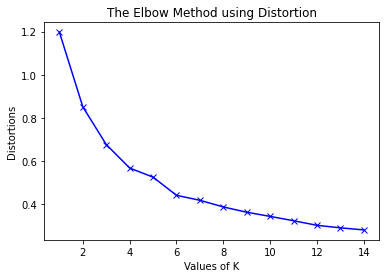

In [6]:
#Plot using Distortion
for key, val in mapping1.items():
    print(str(key)+' : '+str(val))
    
#plot Code
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortions')
plt.title('The Elbow Method using Distortion')
plt.show()

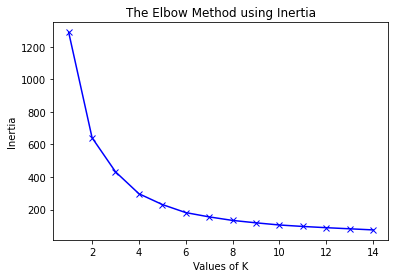

In [7]:
# Visualizing the result -

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()